In [1]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import requests
import pyttsx3
import logging
from datetime import datetime

# API key for OpenWeatherMap
api_key = "d7c9a286ffb25cc4678f51fcdce37f7c"
log_file = "weather_alerts.log"

# Initialize logging
logging.basicConfig(filename=log_file, level=logging.INFO)


In [2]:
#  Function to fetch current weather data
def get_weather_data(location):
    base_url = "https://api.openweathermap.org/data/2.5/weather"
    params = {
        'q': location,
        'appid': api_key,
        'units': 'metric'
    }
    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        weather_data = response.json()
        return weather_data
    else:
        print("Error fetching weather data.")
        return None


In [3]:
#  Function to fetch forecast data
def get_forecast_data(location):
    base_url = "https://api.openweathermap.org/data/2.5/forecast"
    params = {
        'q': location,
        'appid': api_key,
        'units': 'metric'
    }
    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        forecast_data = response.json()
        return forecast_data
    else:
        print("Error fetching forecast data.")
        return None


In [4]:
#  Function to display weather information
def display_weather(weather_data):
    if weather_data:
        temperature = weather_data['main']['temp']
        humidity = weather_data['main']['humidity']
        weather_description = weather_data['weather'][0]['description']
        print(f"Temperature: {temperature}°C")
        print(f"Humidity: {humidity}%")
        print(f"Conditions: {weather_description}")
        return temperature, humidity, weather_description
    else:
        print("No data to display.")
        return None, None, None


In [5]:
#  Logging weather information
def log_weather_info(location, temperature, humidity, description):
    log_message = f"{datetime.now()} - Location: {location}, Temp: {temperature}°C, Humidity: {humidity}%, Conditions: {description}"
    logging.info(log_message)


In [6]:
#  Checking for heat wave conditions
def check_heat_wave(temperature, threshold=30):
    if temperature >= threshold:
        alert_message = "Heat Wave Alert! Stay hydrated and avoid prolonged exposure to the sun."
        print(alert_message)
        speak(alert_message)
    else:
        message = "No heat wave alert. Stay cool and enjoy your day!"
        print(message)
        speak(message)

def speak(text):
    engine = pyttsx3.init()
    engine.say(text)
    engine.runAndWait()


In [7]:
#  Checking forecast data for upcoming heat waves
def check_forecast_heat_wave(forecast_data, threshold=30):
    dates = []
    temperatures = []
    humidities = []

    for forecast in forecast_data['list']:
        dt = datetime.fromtimestamp(forecast['dt'])
        temperature = forecast['main']['temp']
        humidity = forecast['main']['humidity']

        dates.append(dt)
        temperatures.append(temperature)
        humidities.append(humidity)

        if temperature >= threshold:
            print(f"Forecast Alert: {temperature}°C expected on {dt}.")
            log_weather_info(forecast_data['city']['name'], temperature, humidity, forecast['weather'][0]['description'])
            speak(f"Heat Wave Alert! {temperature} degrees Celsius expected on {dt}. Stay hydrated and safe.")

    plot_forecast(dates, temperatures, humidities)

# Function to plot the forecast data
def plot_forecast(dates, temperatures, humidities):
    plt.figure(figsize=(10, 5))

    # Temperature plot
    plt.subplot(1, 2, 1)
    plt.plot(dates, temperatures, label='Temperature (°C)', color='r')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.title('Temperature Forecast')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()

    # Humidity plot
    plt.subplot(1, 2, 2)
    plt.bar(dates, humidities, label='Humidity (%)', color='b')
    plt.xlabel('Date')
    plt.ylabel('Humidity (%)')
    plt.title('Humidity Forecast')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()


Enter a city or ZIP code: Anantapur
Temperature: 28.09°C
Humidity: 60%
Conditions: overcast clouds
No heat wave alert. Stay cool and enjoy your day!
Forecast Alert: 31.01°C expected on 2024-07-26 11:30:00.
Forecast Alert: 31.59°C expected on 2024-07-26 14:30:00.
Forecast Alert: 30.13°C expected on 2024-07-27 11:30:00.
Forecast Alert: 32.83°C expected on 2024-07-27 14:30:00.
Forecast Alert: 31.97°C expected on 2024-07-27 17:30:00.
Forecast Alert: 31.13°C expected on 2024-07-28 11:30:00.
Forecast Alert: 33°C expected on 2024-07-28 14:30:00.
Forecast Alert: 31.15°C expected on 2024-07-28 17:30:00.
Forecast Alert: 32.33°C expected on 2024-07-29 11:30:00.
Forecast Alert: 33.97°C expected on 2024-07-29 14:30:00.
Forecast Alert: 31.98°C expected on 2024-07-29 17:30:00.
Forecast Alert: 31.87°C expected on 2024-07-30 11:30:00.
Forecast Alert: 33.59°C expected on 2024-07-30 14:30:00.
Forecast Alert: 31.69°C expected on 2024-07-30 17:30:00.


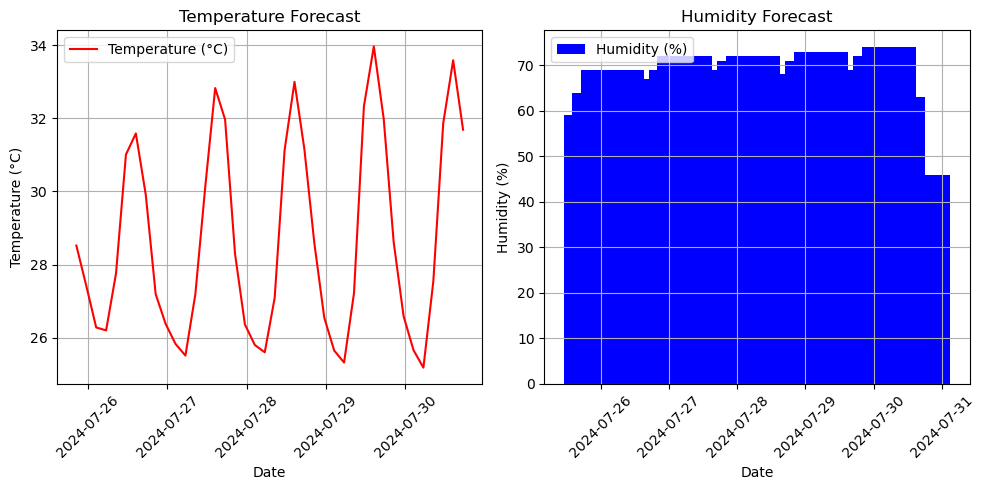

In [8]:
#  Main execution
location = input("Enter a city or ZIP code: ") or "auto-detect"
if location == "auto-detect":
    print("Auto-detection is not implemented. Please enter a city or ZIP code.")
    exit()

weather_data = get_weather_data(location)
temperature, humidity, weather_description = display_weather(weather_data)

if temperature is not None:
    log_weather_info(location, temperature, humidity, weather_description)
    check_heat_wave(temperature)

# Check forecast data for upcoming heat waves
forecast_data = get_forecast_data(location)
if forecast_data:
    check_forecast_heat_wave(forecast_data)
